# **Clasificação: K-NN**

Neste exemplo sera mostrado o uso do **modelo de K-NN** para a clasificação de eventos.

Para criar um conjunto de dados, podemos usar o comando -> make_clasification  da bibiloteca  -> _sklearn.dataset_, onde:
   * n_samples: número de eventos.
   * n_features: número variáveis.
   * class_sep: indica quan separadas estão as clases.
   * n_classes: indica o número de clases a ser geradas.

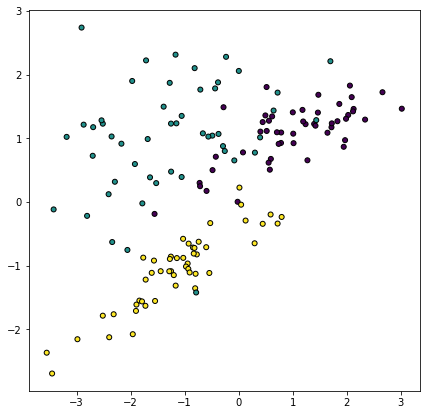

In [45]:
# matplotlib notebook
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification

plt.figure(figsize=(7,7))
plt.subplot(111)
X1, Y1 = make_classification(n_samples=150, n_features=2, n_redundant=0, n_informative=2, 
                             n_clusters_per_class=1, random_state = 3, class_sep=1.1, n_classes = 3)
plt.scatter(X1[:,0], X1[:,1], marker="o", c=Y1, s=25, edgecolor='k')
plt.show()

Depois de riado e graficado os dados, se procede a clasificar os eventos usando o comando  -> _KNeiborsClassifier_, onde
   * k: indica o número de vizinhos próximos que vamos considerar. 
   


In [46]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import numpy as np

knn = KNeighborsClassifier(n_neighbors = 3)

# Criação do grupo de treino e teste 
X_train, X_test, y_train, y_test = train_test_split(X1, Y1, random_state = 1)


# se Clasifica usando fit
knn.fit(X_train, y_train)

# se imprime o score
print("Treino: {}\n".format(knn.score(X_train, y_train)))
print("Teste: {}\n".format(knn.score(X_test, y_test)))

Treino: 0.9285714285714286

Teste: 0.868421052631579




O score e o gráfico do ajuste mudam como dependência do valor de **k**, considerando:
   * k = 1: o score do treino sera 1 mas o teste sempre é menor.
   * k > 1: o score de treino e teste ficam mais próximos.

 A ideia fundamental é encontrar um  valor ótimo (compromiso entre treino e teste) 

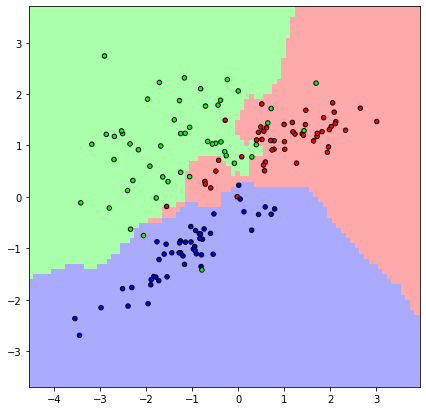

In [47]:
from matplotlib.colors import ListedColormap
x_min, x_max = X1[:,0].min() - 1, X1[:,0].max() + 1
y_min, y_max = X1[:,1].min() - 1, X1[:,1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),np.arange(y_min, y_max, 0.1))

cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.figure(figsize=(7,7))
plt.pcolormesh(xx, yy, Z, cmap = cmap_light)
plt.scatter(X1[:,0], X1[:,1], c=Y1, cmap=cmap_bold,edgecolor="k", s=20)
plt.show()